#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

*Numeric data: I would want to run summary statistics to see the distribution of my numeric variables and a create a histogram to vizualize the distribution,

Categorical data: I would want to see the counts of each value in a category so if i have a dataset of items that my boss ordered for my company and it contains keyboards, webcams, and mousepads, i want to know how many of each were ordered

Relationship: I would create a boxplot that contains the distribution of my numeric variable that is faceted for each individual instance of my categorical variable. Maybe if i performed 50 shows in 5 different cities, i want to see the distribution of attendance for all 5 cities

*

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [4]:
import pandas as pd
import numpy as np

# List of 10 American cities
cities = [
    "NYC", "LA", "CHI", "HOU", "PHX",
    "PHI", "SF", "SD", "DAL", "BOS"
]

# Generate data
n = 1000
df = pd.DataFrame({
    "city": np.random.choice(cities, size=n, replace=True),
    "n1": np.random.normal(loc=10000, scale=500, size=n),
    "n2": np.random.randint(1, 101, size=n)
})

df.head(30)


,city,n1,n2
0,SF,9309.571588,37
1,SD,9751.046954,11
2,SD,10044.344527,23
3,SF,10189.515425,63
4,PHI,10581.374275,18
5,NYC,10062.602231,44
6,DAL,9867.740891,67
7,NYC,10420.827423,21
8,SD,10291.605114,2
9,HOU,10181.240781,72


In [5]:
# Your code here
df[['n1','n2']].describe()

,n1,n2
count,1000.000000,1000.000000
mean,9989.635592,51.808000
std,491.749947,28.367091
min,8206.425175,1.000000
25%,9647.847005,28.000000
50%,9984.144261,52.500000
75%,10338.879994,76.000000
max,11593.816340,100.000000


In [6]:
df['city'].value_counts()

city
SF     120
CHI    113
HOU    105
LA     104
DAL    103
PHI     99
PHX     97
NYC     92
BOS     87
SD      80
Name: count, dtype: int64

<Axes: xlabel='city', ylabel='n1'>

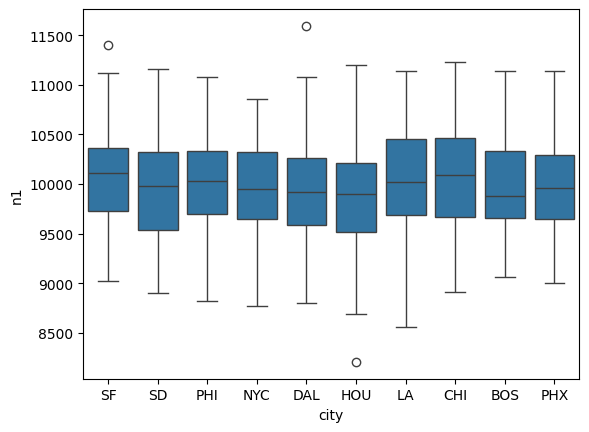

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='city', y='n1', data=df)


<Axes: xlabel='city', ylabel='n2'>

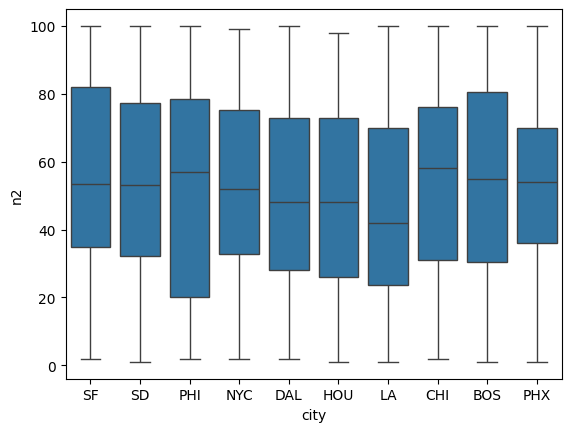

In [8]:
sns.boxplot(x='city', y='n2', data=df)



#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [9]:
cities = ["NYC", "LA", "CHI", "BOS", "PHI"] 
n = 1000
df = pd.DataFrame({
    "city": np.random.choice(cities, size=n, replace=True),
    "n1": np.random.normal(loc=10000, scale=500, size=n),
    "n2": np.random.normal(loc=4000, scale=200, size=n),
    "n3": np.random.normal(loc=29500, scale=600, size=n),
    "n4": np.random.normal(loc=10, scale=2.5, size=n),
    "target": np.random.randint(0, 2, size=n)
})

for col in df.columns:
    if col != "target": 
        n_missing = int(0.05 * len(df))  # 5% of rows
        missing_idx = np.random.choice(df.index, size=n_missing, replace=False)
        df.loc[missing_idx, col] = np.nan

df.describe()

,n1,n2,n3,n4,target
count,950.000000,950.000000,950.000000,950.000000,1000.000000
mean,10045.348611,4000.208397,29500.510882,9.984912,0.515000
std,496.379429,204.926725,603.499503,2.465880,0.500025
min,8399.892271,3418.733049,27587.301455,1.668617,0.000000
25%,9706.640733,3851.706484,29099.733404,8.248721,0.000000
50%,10055.763468,4001.779069,29520.455913,10.036749,1.000000
75%,10361.389125,4137.646261,29894.289172,11.569142,1.000000
max,11667.601930,4643.256268,31626.048192,17.475390,1.000000


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [18]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
X = df.drop(columns=["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


numeric_features = ["n1", "n2","n3","n4"]
categorical_features = ["city"]

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
Pipeline1 = Pipeline([
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression())
])


Pipeline1.fit(X_train, y_train) 
predictions = Pipeline1.fit(X_train, y_train) .predict(X_test) 
from sklearn.metrics import classification_report 
print(classification_report(y_test, predictions))

cross_val_score(Pipeline1, X, y, scoring="f1", cv=5)



              precision    recall  f1-score   support

           0       0.49      0.43      0.46       120
           1       0.53      0.58      0.55       130

    accuracy                           0.51       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.51      0.51      0.51       250



array([0.58091286, 0.6023166 , 0.55737705, 0.59574468, 0.56302521])

Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [19]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
X = df.drop(columns=["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


numeric_features = ["n1", "n2","n3","n4"]
categorical_features = ["city"]

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
Pipeline1 = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state= 42))
])


Pipeline1.fit(X_train, y_train) 
predictions = Pipeline1.fit(X_train, y_train) .predict(X_test) 
from sklearn.metrics import classification_report 
print(classification_report(y_test, predictions))

cross_val_score(Pipeline1, X, y, scoring="f1", cv=5)




              precision    recall  f1-score   support

           0       0.50      0.52      0.51       120
           1       0.54      0.52      0.53       130

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.52      0.52      0.52       250



array([0.57918552, 0.47115385, 0.49746193, 0.52173913, 0.52830189])

Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

The Random forest had a higher value for its f1 score than the logistic regression, Both models had similar scores ehich makes sense because there is randomly generated data which means that there should be essentially zero signal between the x and y variables. Random forest models may perform a little bit better because the model is more likely to make splits that can better capture how x effects y than a generalized linear model. An f1 score that is essentially .5 makes sense as there  essentially a 50/50 split of 1s and 0s in the output column.